In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

KeyboardInterrupt: 

In [6]:
# Descriptieve discriminantanalyse in Python

def highlight_columns(df, rows=20, color='lightgreen', columns_to_shadow=[], columns_to_show=[]):
    highlight = lambda slice_of_df: 'background-color: %s' % color
    sample_df = df.head(rows)
    if len(columns_to_show) != 0:
        sample_df = sample_df[columns_to_show]
    highlighted_df = sample_df.style.applymap(highlight, subset=pd.IndexSlice[:, columns_to_shadow])
    return highlighted_df

In [7]:
# Descriptieve discriminantanalyse in Python
# gegevens inlezen
biopsy = pd.read_csv('../datasets/biopsy.csv')
# LDA model fitten op slechts 2 van de 9 inputs en target
X = biopsy[['V1', 'V2']]
y = biopsy['class']
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

highlight_columns(biopsy.head(8), columns_to_shadow=['V1', 'V2', 'V3'])

In [8]:
import matplotlib.pyplot as plt

# map de onafhankelijke variabelen met de discriminantfuncties uit het model naar hun discriminantwaarden LD
LD = lda.transform(X)

# combineer met de oorspronkelijke afhankelijke variabele
LD_df = pd.DataFrame(zip(LD[:, 0], biopsy['class']), columns=['LD1', 'Target'])
biopsy[['V1', 'V2', 'V3']].join(LD_df).head(6)

# _ = df.hist(column=['LD1'], by='Target',
#             bins=25, density=True,
#             edgecolor='black', color='cyan',
#             sharex=True, sharey=True,
#             figsize=(10,10), layout=(2,1))

V1  V2  V3       LD1     Target
0   5   1   1 -0.809612     benign
1   5   4   4  0.539399     benign
2   3   1   1 -1.325530     benign
3   6   8   8  2.596039     benign
4   4   1   1 -1.067571     benign
5   8  10  10  4.011297  malignant

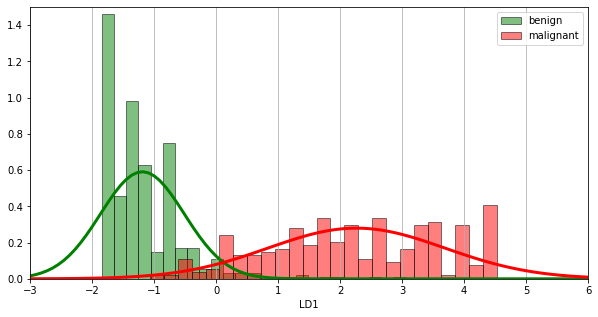

In [9]:
# Met één as
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['green', 'red']
x = np.linspace(-3, 6, 100)

for i, target_value in enumerate(LD_df.Target.unique()):
    mean = LD_df['LD1'][LD_df['Target'] == target_value].mean()
    std = LD_df['LD1'][LD_df['Target'] == target_value].std()
    verdeling = norm(loc=mean, scale=std)
    LD_df['LD1'][LD_df['Target'] == target_value].hist(ax=ax,
                                                       bins=25, density=True,
                                                       edgecolor='black', color=colors[i], alpha=0.5,
                                                       label=target_value)
    ax.plot(x, verdeling.pdf(x), color=colors[i], linewidth=3)
    ax.legend()
    ax.grid(axis='y')
    ax.set_xlim((-3, 6))
    ax.set_ylim((0, 1.5))
    ax.set_xlabel('LD1')

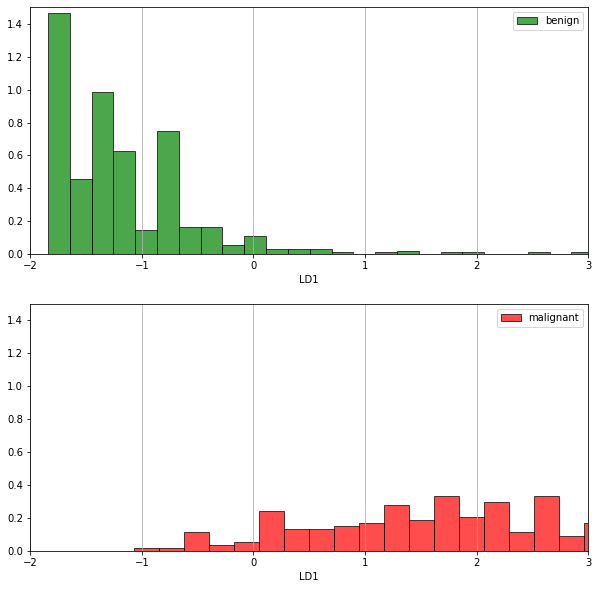

In [10]:
# Met twee assen

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
colors = ['green', 'red']

for i, target_value in enumerate(LD_df.Target.unique()):
    LD_df['LD1'][LD_df['Target'] == target_value].hist(ax=axes[i],
                                                       bins=25, density=True,
                                                       edgecolor='black', color=colors[i], alpha=0.7,
                                                       label=target_value)
    axes[i].legend()
    axes[i].grid(axis='y')
    axes[i].set_xlim((-2, 3))
    axes[i].set_ylim((0, 1.5))
    axes[i].set_xlabel('LD1')

In [11]:
# Predictive discriminantanalyse in Python
lda.predict_proba(X)  # output kansen of scores
lda.predict(X)  # output klassen
LD = lda.transform(X)

# with np.printoptions(precision=3, suppress=True):
#     print(lda.predict_proba(X))
#     print(lda.predict(X))

In [12]:
# Predictive discriminantanalyse in Python
voorspeld = pd.Series(lda.predict(X), name='voorspeld')
werkelijk = biopsy['class'].rename('werkelijk')
pd.crosstab(voorspeld, werkelijk, margins='all', margins_name='total')

werkelijk  benign  malignant  total
voorspeld                          
benign        450         40    490
malignant       8        201    209
total         458        241    699

In [13]:
from scripts.evaluatiemetrieken import *

cm = pd.crosstab(voorspeld, werkelijk)

In [14]:
accuracy(cm)

Accuracy
Total   0.93133

In [15]:
precision(cm, weighted=False)

Precision
voorspeld           
benign      0.918367
malignant   0.961722

In [16]:
recall(cm, weighted=False)

Recall
werkelijk          
benign     0.982533
malignant  0.834025

In [17]:
fmeasure(cm, weighted=False)

F1
voorspeld          
benign     0.949367
malignant  0.893333